In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/minsearch/main/minsearch.py

--2024-06-30 07:00:28--  https://raw.githubusercontent.com/alexeygrigorev/minsearch/main/minsearch.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3832 (3.7K) [text/plain]
Saving to: ‘minsearch.py’

minsearch.py        100%[===================>]   3.74K  --.-KB/s    in 0s      

2024-06-30 07:00:28 (29.2 MB/s) - ‘minsearch.py’ saved [3832/3832]



In [12]:
import minsearch

In [3]:
import json

In [4]:
with open ('documents.json', 'rt') as f_in:
    docs_raw = json.load(f_in)

In [7]:
documents = []
for course_dict in docs_raw:
    for doc in course_dict['documents']:
        doc['course'] = course_dict['course']
        documents.append(doc)

In [8]:
documents[0]

{'text': "The purpose of this document is to capture frequently asked technical questions\nThe exact day and hour of the course will be 15th Jan 2024 at 17h00. The course will start with the first  “Office Hours'' live.1\nSubscribe to course public Google Calendar (it works from Desktop only).\nRegister before the course starts using this link.\nJoin the course Telegram channel with announcements.\nDon’t forget to register in DataTalks.Club's Slack and join the channel.",
 'section': 'General course-related questions',
 'question': 'Course - When will the course start?',
 'course': 'data-engineering-zoomcamp'}

In [13]:
index = minsearch.Index(text_fields=["question", "text", "section"],
    keyword_fields=["course"])

In [14]:
q = 'the course has already started, can I still enroll?'

In [15]:
index.fit(documents)

In [24]:
    boost = {'question': 3.0, 'section': 0.5}
result = index.search(
    filter_dict={'course': 'data-engineering-zoomcamp'},
    query=q,
    boost_dict=boost,
    num_results=5
)

In [25]:
result

[{'text': "Yes, even if you don't register, you're still eligible to submit the homeworks.\nBe aware, however, that there will be deadlines for turning in the final projects. So don't leave everything for the last minute.",
  'section': 'General course-related questions',
  'question': 'Course - Can I still join the course after the start date?',
  'course': 'data-engineering-zoomcamp'},
 {'text': 'Yes, we will keep all the materials after the course finishes, so you can follow the course at your own pace after it finishes.\nYou can also continue looking at the homeworks and continue preparing for the next cohort. I guess you can also start working on your final capstone project.',
  'section': 'General course-related questions',
  'question': 'Course - Can I follow the course after it finishes?',
  'course': 'data-engineering-zoomcamp'},
 {'text': "The purpose of this document is to capture frequently asked technical questions\nThe exact day and hour of the course will be 15th Jan 202

## Using LLM

In [16]:
from openai import OpenAI

In [18]:
client = OpenAI()

In [26]:
response = client.chat.completions.create(
    model='gpt-4o',
    messages=[{"role": "user", "content": q}]
)

response.choices[0].message.content

"Typically, whether you can still enroll in a course after it has started depends on the policies of the institution offering the course. Here are a few steps you can take to find out:\n\n1. **Check the Course Enrollment Policy**: Look up the course or institution’s enrollment policies on their website. They often have guidelines about late enrollment.\n\n2. **Contact the Instructor or Administration**: Reach out directly to the course instructor, academic advisor, or the registrar's office. They can provide specific information about the possibility of late enrollment.\n\n3. **Understand the Implications**: If late enrollment is possible, inquire about any consequences or requirements, such as catching up on missed work, extra fees, or any additional support you might need.\n\n4. **Consider the Workload**: Evaluate whether you can realistically catch up on missed content and assignments. Assess your schedule to ensure you can handle the additional workload.\n\n5. **Special Circumstanc

In [43]:
prompt_template = """
You are a course teaching assistant. Answer thr QUESTION based on the CONTEXT. 
Use only the facts the CONTEXT when answering the QUESTION. 
If the CONTEXT does not contain the answer, output NONE

QUESTION: {question}

CONTEXT: {context}
""".strip()

In [40]:
context = ""
for doc in result:
    context = context + f"section:{doc['section']}\nquestion: {doc['question']}\nanswer: {doc['text']}\n\n"

In [41]:
print(context)

section:General course-related questions
question: Course - Can I still join the course after the start date?
answer: Yes, even if you don't register, you're still eligible to submit the homeworks.
Be aware, however, that there will be deadlines for turning in the final projects. So don't leave everything for the last minute.

section:General course-related questions
question: Course - Can I follow the course after it finishes?
answer: Yes, we will keep all the materials after the course finishes, so you can follow the course at your own pace after it finishes.
You can also continue looking at the homeworks and continue preparing for the next cohort. I guess you can also start working on your final capstone project.

section:General course-related questions
question: Course - When will the course start?
answer: The purpose of this document is to capture frequently asked technical questions
The exact day and hour of the course will be 15th Jan 2024 at 17h00. The course will start with t

In [46]:
prompt = prompt_template.format(question=q, context=context).strip()

In [47]:
print(prompt)

You are a course teaching assistant. Answer thr QUESTION based on the CONTEXT. 
Use only the facts the CONTEXT when answering the QUESTION. 
If the CONTEXT does not contain the answer, output NONE

QUESTION: the course has already started, can I still enroll?

CONTEXT: section:General course-related questions
question: Course - Can I still join the course after the start date?
answer: Yes, even if you don't register, you're still eligible to submit the homeworks.
Be aware, however, that there will be deadlines for turning in the final projects. So don't leave everything for the last minute.

section:General course-related questions
question: Course - Can I follow the course after it finishes?
answer: Yes, we will keep all the materials after the course finishes, so you can follow the course at your own pace after it finishes.
You can also continue looking at the homeworks and continue preparing for the next cohort. I guess you can also start working on your final capstone project.

sec

In [48]:
response = client.chat.completions.create(
    model='gpt-4o',
    messages=[{"role": "user", "content": prompt}]
)

response.choices[0].message.content

"Yes, even if you don't register, you're still eligible to submit the homeworks. Be aware, however, that there will be deadlines for turning in the final projects. So don't leave everything for the last minute."

All above: we took the documents from knowlage base and based on the context build prompt with we send to LLM, get the answer and returned to the user
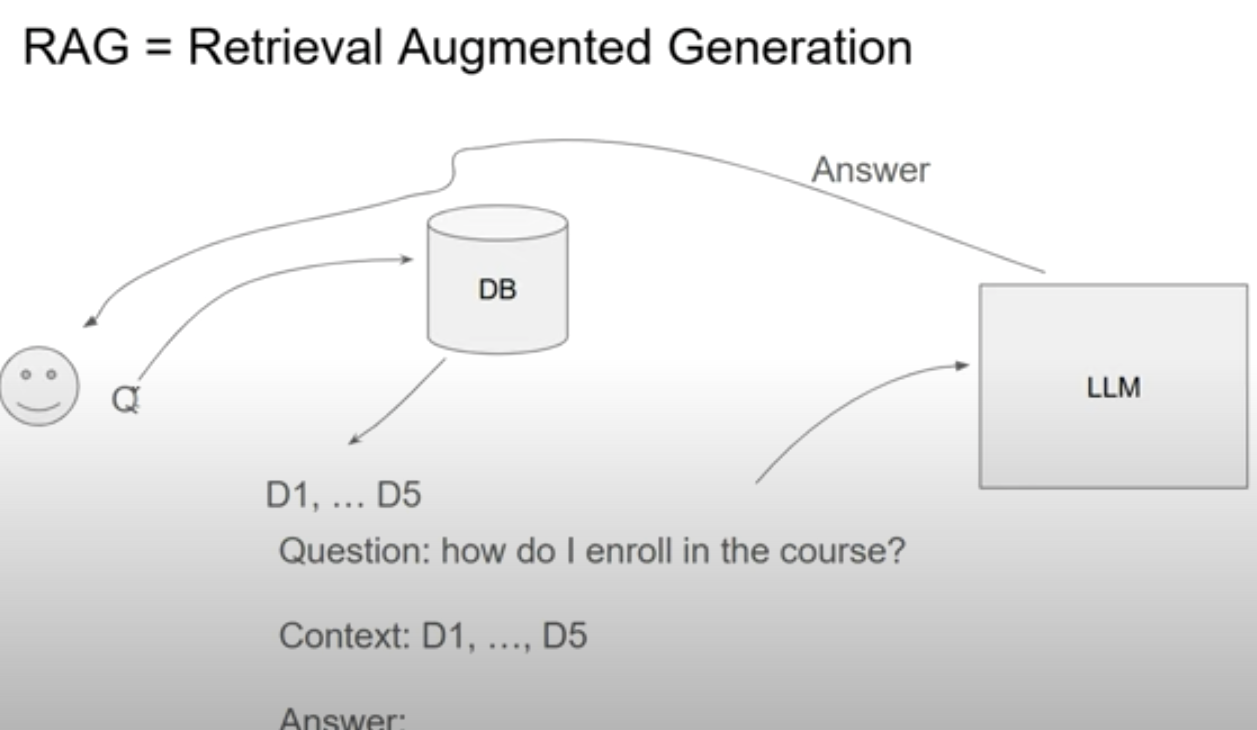

### Clean vertion of all above

In [49]:
def search(query):
    boost = {'question': 3.0, 'section': 0.5}

    results = index.search(
        query=query,
        filter_dict={'course': 'data-engineering-zoomcamp'},
        boost_dict=boost,
        num_results=5
    )

    return results

In [50]:
def build_prompt(query, search_results):
    prompt_template = """
You're a course teaching assistant. Answer the QUESTION based on the CONTEXT from the FAQ database.
Use only the facts from the CONTEXT when answering the QUESTION.

QUESTION: {question}

CONTEXT: 
{context}
""".strip()

    context = ""
    
    for doc in search_results:
        context = context + 
        f"section: {doc['section']}\nquestion: {doc['question']}\nanswer: {doc['text']}\n\n"
    
    prompt = prompt_template.format(question=query, context=context).strip()
    return prompt

In [51]:
def llm(prompt):
    response = client.chat.completions.create(
        model='gpt-4o',
        messages=[{"role": "user", "content": prompt}]
    )
    
    return response.choices[0].message.content

In [52]:
query = 'how do I run kafka?'

def rag(query):
    search_results = search(query)
    prompt = build_prompt(query, search_results)
    answer = llm(prompt)
    return answer

In [53]:
rag(query)

"To run Kafka, follow these instructions based on your environment and programming language:\n\n**For Java:**\n\nIn your project directory, execute the following command to run a Kafka producer or consumer:\n```bash\njava -cp build/libs/<jar_name>-1.0-SNAPSHOT.jar:out src/main/java/org/example/JsonProducer.java\n```\n\nReplace `<jar_name>` with the actual name of your jar file.\n\n**For Python:**\n\n1. Set up a virtual environment. Run these commands only once to create the environment and install packages:\n   ```bash\n   python -m venv env\n   source env/bin/activate\n   pip install -r ../requirements.txt\n   ```\n   \n2. Activate the virtual environment each time you need to run the Kafka scripts:\n   ```bash\n   source env/bin/activate\n   ```\n\n3. To deactivate the virtual environment, use:\n   ```bash\n   deactivate\n   ```\n\nNote: The path may vary on Windows; use `env/Scripts/activate` to activate the virtual environment in that case. Always ensure Docker images are up and ru

In [54]:
rag('the course has already started, can I still enroll?')

'Yes, you can still enroll in the course even after it has started. You are eligible to submit the homeworks, but be mindful of the deadlines for the final projects to avoid last-minute issues.'

In [55]:
documents[0]

{'text': "The purpose of this document is to capture frequently asked technical questions\nThe exact day and hour of the course will be 15th Jan 2024 at 17h00. The course will start with the first  “Office Hours'' live.1\nSubscribe to course public Google Calendar (it works from Desktop only).\nRegister before the course starts using this link.\nJoin the course Telegram channel with announcements.\nDon’t forget to register in DataTalks.Club's Slack and join the channel.",
 'section': 'General course-related questions',
 'question': 'Course - When will the course start?',
 'course': 'data-engineering-zoomcamp'}

### Replace MinSearch with ElesticSearch

Running ElasticSearch:

```
    docker run -it \
    --rm \
    --name elasticsearch \
    -p 9200:9200 \
    -p 9300:9300 \
    -e "discovery.type=single-node" \
    -e "xpack.security.enabled=false" \
    docker.elastic.co/elasticsearch/elasticsearch:8.4.3
```

In [56]:
from elasticsearch import Elasticsearch

In [60]:
es_client = Elasticsearch('http://localhost:9200') 

In [61]:
index_settings = {
    "settings": {
        "number_of_shards": 1,
        "number_of_replicas": 0
    },
    "mappings": {
        "properties": {
            "text": {"type": "text"},
            "section": {"type": "text"},
            "question": {"type": "text"},
            "course": {"type": "keyword"} 
        }
    }
}

index_name = "course-questions"

es_client.indices.create(index=index_name, body=index_settings)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'course-questions'})

In [62]:
documents[0]

{'text': "The purpose of this document is to capture frequently asked technical questions\nThe exact day and hour of the course will be 15th Jan 2024 at 17h00. The course will start with the first  “Office Hours'' live.1\nSubscribe to course public Google Calendar (it works from Desktop only).\nRegister before the course starts using this link.\nJoin the course Telegram channel with announcements.\nDon’t forget to register in DataTalks.Club's Slack and join the channel.",
 'section': 'General course-related questions',
 'question': 'Course - When will the course start?',
 'course': 'data-engineering-zoomcamp'}

In [63]:
from tqdm.auto import tqdm

/usr/local/python/3.10.13/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [64]:
for doc in tqdm(documents):
    es_client.index(index=index_name, document=doc)

100%|████████████████████████████████████████████████████████████████████| 948/948 [00:29<00:00, 32.63it/s]


In [65]:
query = 'I just disovered the course. Can I still join it?'

In [66]:
def elastic_search(query):
    search_query = {
        "size": 5,
        "query": {
            "bool": {
                "must": {
                    "multi_match": {
                        "query": query,
                        "fields": ["question^3", "text", "section"],
                        "type": "best_fields"
                    }
                },
                "filter": {
                    "term": {
                        "course": "data-engineering-zoomcamp"
                    }
                }
            }
        }
    }

    response = es_client.search(index=index_name, body=search_query)
    
    result_docs = []
    
    for hit in response['hits']['hits']:
        result_docs.append(hit['_source'])
    
    return result_docs

In [67]:
def rag(query):
    search_results = elastic_search(query)
    prompt = build_prompt(query, search_results)
    answer = llm(prompt)
    return answer

In [68]:
rag(query)

'Yes, you can still join the course even if you have just discovered it. You are eligible to submit the homework assignments. However, be mindful of the deadlines for turning in the final projects, so it is important not to delay your work.'